In [1]:
#TOMADO DE LA PAGINA https://towardsdatascience.com/gale-shapley-algorithm-simply-explained-caa344e643c2

# ANOTACION IMPORTANTE DEL DESARROLLO
# inicialmente el vector de preferencias era netamente aleatorio que podia suceder casos como [1,1,2]
# en preferencias, para los casos n pequeños funcionó normal aumentando exponencialmente los casos -1 (no solucionables)
# ajusté el programa para que asegurara preferecias diferentes [3,2,1], [1,3,2] y así :v 

import pandas as pd
import numpy as np
import random as rnd
from collections import Counter
from copy import copy
import matplotlib.pyplot as plt

In [2]:
def Married():
  # dict to control which women each man can make proposals
  women_available = {man:women_list for man in man_list}
  # waiting list of men that were able to create pair on each iteration
  waiting_list = []
  # dict to store created pairs
  proposals = {}
  # variable to count number of iterations
  count = 0

  # while not all men have pairs
  while len(waiting_list)<len(man_list):
      # man makes proposals
      for man in man_list:
          if man not in waiting_list:
              # each man make proposal to the top women from it's list
              women = women_available[man]
              best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
              proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                  women_df.loc[man][best_choice])
      # if women have more than one proposals 
      # she will choose the best option
      overlays = Counter([key[1] for key in proposals.keys()])
      # cycle to choose the best options
      for women in overlays.keys():
          if overlays[women]>1:
              # pairs to drop from proposals
              pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                      if women in pair}.items(), 
                    key=lambda x: x[1][1]
                    )[1:]
              # if man was rejected by woman
              # there is no pint for him to make proposal 
              # second time to the same woman
              for p_to_drop in pairs_to_drop:
                  del proposals[p_to_drop[0]]
                  _women = copy(women_available[p_to_drop[0][0]])
                  _women.remove(p_to_drop[0][1])
                  women_available[p_to_drop[0][0]] = _women
      # man who successfully created pairs must be added to the waiting list 
      waiting_list = [man[0] for man in proposals.keys()]
      # update counter
      count+=1

  return proposals, count

In [3]:
#man_list = ['a', 'b', 'c', 'd']
#women_list = ['A', 'B', 'C', 'D']

#women_df = pd.DataFrame({'A': [3,4,2,1], 'B': [3,1,4,2], 'C':[2,3,4,1], 'D':[3,2,1,4]})
#women_df.index = man_list

#man_df = pd.DataFrame({'A': [1,1,2,4], 'B': [2,4,1,2], 'C':[3,3,3,3], 'D':[4,2,4,1]})
#man_df.index = man_list

#print("Women table")
#print(women_df)
#print()
#print("Man table")
#print(man_df)

In [4]:
def CrearTablas(n):
  man_list = [];
  women_list = [];
  women_df = pd.DataFrame();
  man_df = pd.DataFrame();

  number_list = []
  for i in range(n):
    number_list.append(i)
  for i in range(n):
    man_list.append(str(i))
    women_list.append(str(i))
    
    rnd.shuffle(number_list)
    man_df[str(i)] = number_list
    
    rnd.shuffle(number_list)
    women_df[str(i)] = number_list;
    
  women_df.index = man_list
  man_df.index = man_list
  return man_list, women_list,man_df, women_df

In [5]:
def pintarHistograma(conteo, errores,n):

  print("Hubo ", errores, "casos que no tenian solución")
  print()
  for i in range(errores):
    conteo.append(-1)
  
  if(max(conteo) == -1):
      bins = 1
  else:
      bins=(max(conteo)+1)
  
  plt.title("Frecuencia")
  plt.hist(conteo, bins, alpha=1, edgecolor = 'black',  linewidth=1)
  plt.grid(True)
  plt.show()

El mejor caso fue 1 con la combinacion  {('0', '3'): (0, 1), ('1', '1'): (0, 3), ('2', '0'): (0, 2), ('3', '2'): (1, 0)}

La table fue de Chicos era
   0  1  2  3
0  1  1  3  0
1  2  0  0  2
2  0  3  2  3
3  3  2  1  1

La table fue de Chicas era
   0  1  2  3
0  1  1  2  1
1  0  3  1  3
2  2  2  3  2
3  3  0  0  0
Hubo  36 casos que no tenian solución



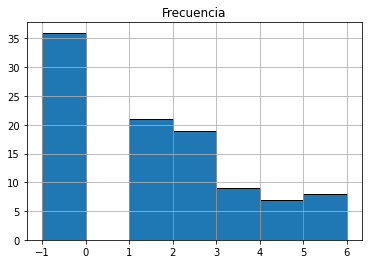

In [6]:
n = 4;
conteo = [];
errores = 0;
mejorCaso = [0,0,0,0];
for i in range(100):
  try:

    x = CrearTablas(n)
    man_list = x[0]
    women_list = x[1]
    man_df = x[2]
    women_df = x[3]
    
    x = Married();
    conteo.append(x[1]);

    if(x[1] <= min(conteo)):
      mejorCaso[0] = x[0];
      mejorCaso[1] = x[1];
      mejorCaso[2] = man_df;
      mejorCaso[3] = women_df;

  except:
    errores += 1

print("El mejor caso fue", mejorCaso[1], "con la combinacion ", mejorCaso[0])
print()
print("La table fue de Chicos era")
print(mejorCaso[2])
print()
print("La table fue de Chicas era")
print(mejorCaso[3])

pintarHistograma(conteo, errores,n)

El mejor caso fue 2 con la combinacion  {('0', '2'): (0, 2), ('1', '5'): (2, 2), ('2', '4'): (0, 5), ('4', '1'): (0, 1), ('5', '6'): (0, 2), ('6', '3'): (1, 2), ('7', '0'): (0, 3), ('3', '7'): (0, 4)}

La table fue de Chicos era
   0  1  2  3  4  5  6  7
0  2  1  0  4  6  0  3  1
1  3  7  4  7  4  2  5  5
2  6  2  3  5  0  6  1  4
3  1  6  6  0  2  1  6  0
4  5  0  1  6  7  7  7  6
5  4  5  5  2  3  5  0  7
6  7  4  2  1  5  3  2  2
7  0  3  7  3  1  4  4  3

La table fue de Chicas era
   0  1  2  3  4  5  6  7
0  5  7  2  1  6  3  5  0
1  7  5  1  0  3  2  7  5
2  2  4  6  5  5  4  3  7
3  6  2  3  7  2  6  0  4
4  4  1  0  6  4  5  1  1
5  0  3  7  3  1  7  2  2
6  1  6  4  2  7  0  6  3
7  3  0  5  4  0  1  4  6
Hubo  84 casos que no tenian solución



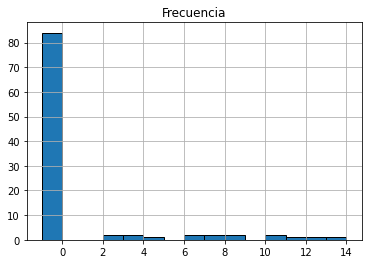

In [14]:
n = 8;
conteo = [];
errores = 0;
mejorCaso = [0,0,0,0];
for i in range(100):
  try:
    x = CrearTablas(n)
    man_list = x[0]
    women_list = x[1]
    man_df = x[2]
    women_df = x[3]
    
    x = Married();
    conteo.append(x[1]);

    if(x[1] <= min(conteo)):
      mejorCaso[0] = x[0];
      mejorCaso[1] = x[1];
      mejorCaso[2] = man_df;
      mejorCaso[3] = women_df;

  except:
    errores += 1

print("El mejor caso fue", mejorCaso[1], "con la combinacion ", mejorCaso[0])
print()
print("La table fue de Chicos era")
print(mejorCaso[2])
print()
print("La table fue de Chicas era")
print(mejorCaso[3])

pintarHistograma(conteo, errores,n)